<a href="https://colab.research.google.com/github/olyvias/python/blob/main/TUGAS11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [77]:
ls

'TUGAS 11'/   TUGAS11.ipynb


In [78]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [79]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("TUGAS 11")
data = []
labels = []

[INFO] loading images...


In [80]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((32, 32))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [81]:
print(labels)

['GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03',

In [82]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [83]:
print(labels)

[[0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 ...
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]]


In [84]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(441, 32, 32, 3)
(148, 32, 32, 3)


In [85]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(64, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 100)               230500    
_________________________________________________________________
dense_19 (Dense)             (None, 5)               

In [86]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [87]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
14/14 [==============================] - 1s 50ms/step - loss: 1.5944 - accuracy: 0.2472 - val_loss: 1.4826 - val_accuracy: 0.4459
Epoch 2/25
14/14 [==============================] - 1s 39ms/step - loss: 1.4050 - accuracy: 0.4127 - val_loss: 1.2191 - val_accuracy: 0.4392
Epoch 3/25
14/14 [==============================] - 1s 40ms/step - loss: 1.2264 - accuracy: 0.4580 - val_loss: 1.2171 - val_accuracy: 0.4122
Epoch 4/25
14/14 [==============================] - 1s 40ms/step - loss: 1.0956 - accuracy: 0.5193 - val_loss: 1.0284 - val_accuracy: 0.5270
Epoch 5/25
14/14 [==============================] - 1s 39ms/step - loss: 0.9697 - accuracy: 0.6009 - val_loss: 1.0033 - val_accuracy: 0.5270
Epoch 6/25
14/14 [==============================] - 1s 40ms/step - loss: 0.8591 - accuracy: 0.6621 - val_loss: 0.8162 - val_accuracy: 0.6419
Epoch 7/25
14/14 [==============================] - 1s 40ms/step - loss: 0.8019 - accuracy: 0.7007 - val_loss: 0.8180 - val_accuracy: 0.6622
Epoch 8/25
14

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


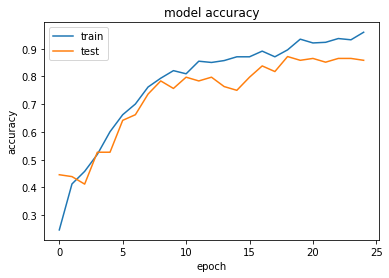

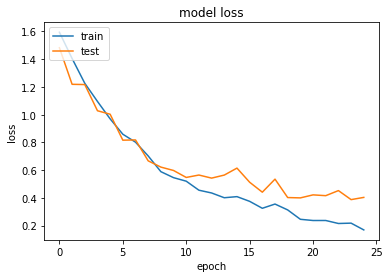

In [88]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [89]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.93      0.72      0.81        18
      GMB_03       0.87      0.77      0.82        26
      GMB_08       0.89      0.94      0.91        33
      GMB_09       0.96      0.82      0.89        33
      GMB_11       0.75      0.95      0.84        38

    accuracy                           0.86       148
   macro avg       0.88      0.84      0.85       148
weighted avg       0.87      0.86      0.86       148



In [119]:
model1.save('olyviafs')

INFO:tensorflow:Assets written to: olyviafs/assets


In [124]:
import cv2
import matplotlib.pyplot as plt
image1='IMG_20200815_205424.jpg'

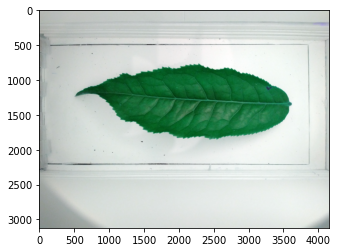

In [125]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [127]:
image_testing = Image.open('IMG_20200815_205424.jpg')
image_testing = np.array(image_testing.resize((32, 32))) / 255.0
image_testing.shape

(32, 32, 3)

In [128]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 32, 32, 3)


In [129]:
output = model1.predict(image_testing, 1,)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[4.2422409e-03 8.5090798e-01 1.0039354e-01 3.0724666e-05 4.4425514e-02]]
['GMB_03']
